In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

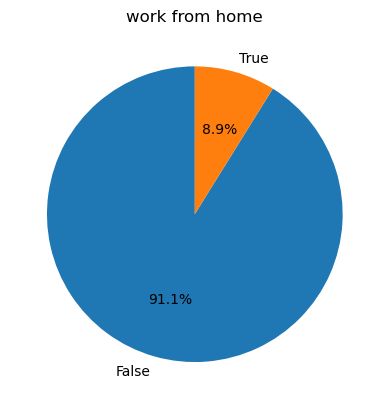

In [8]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('work from home')
plt.ylabel('')
plt.show()

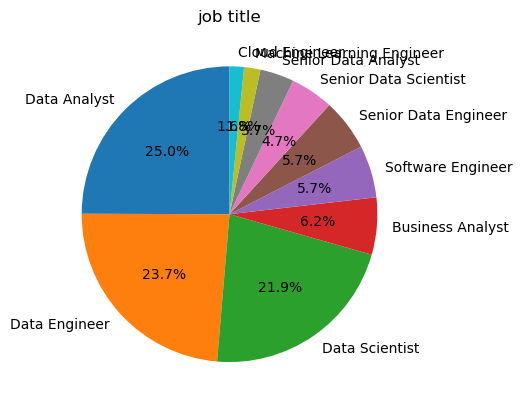

In [15]:
df['job_title_short'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('job title')
plt.ylabel('')
plt.show()

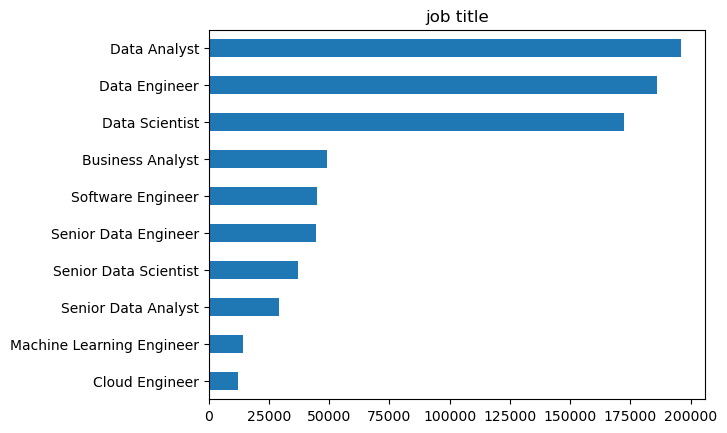

In [6]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title('job title')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

In [9]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


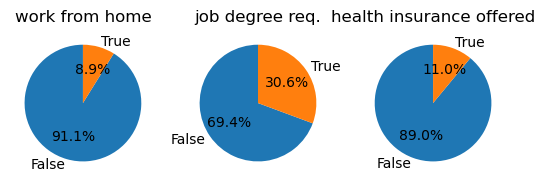

In [17]:
fig, ax = plt.subplots(1,3)

dict_columns = {
    'job_work_from_home' : 'work from home',
    'job_no_degree_mention' : 'job degree req.',
    'job_health_insurance' : 'health insurance offered'
}
for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
    plt.show